In [1]:
library(ggplot2)
library(dplyr)
library(gridExtra)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.4.4"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
# setwd("~/Desktop/CP")
subset <- read.csv("./output/data_processed_0411.csv")
subset <- subset[c(subset$month > 0), ]


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2445 2057 2510 2289 1769 2150 1569 1319 1845 1329 1217 1347  970  480  436  193 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 245   99  183   64  137   61   91   70   67   61   44   61   29   45   28   40 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  14   34   15   21    9   10    8    9    8    4    8    3    8    3    6    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   64   65 
   6    2    7    4    4    3    3    7    4    7    1    2    1    4    4    1 
  66   68   69   70 
   3    2    1    1 

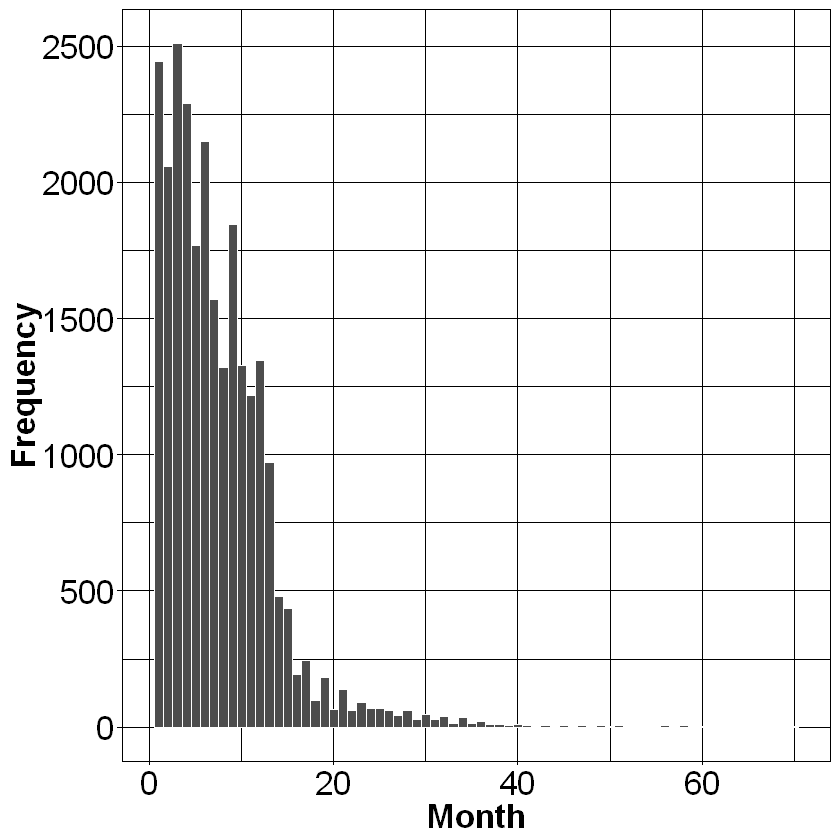

In [3]:
table(subset$month)

#### frequency w/ month ####
ggplot(data=subset, aes(month))+
  geom_histogram(binwidth = 1, fill="gray30", col="white")+
  ylab("Frequency")+
  xlab("Month")+
  theme_linedraw()+
  theme(plot.title = element_text(size = 20, face = "bold", colour='black'),
        legend.title=element_text(size=20), 
        legend.text=element_text(size=20))+
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


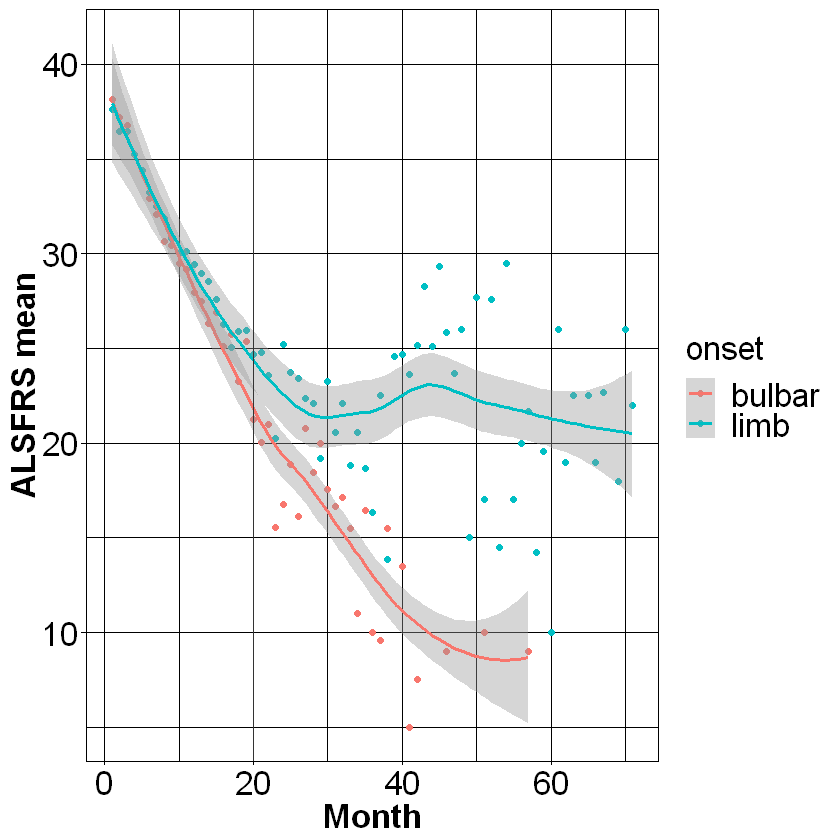

In [4]:

reaction <- read.csv("output/reaction.csv")
reaction$onset <- reaction$first_reaction

reaction_var <- reaction %>%
  group_by(month, onset) %>%
  summarise(var=var(r_alsfrs_r_total), mean=mean(r_alsfrs_r_total))

ggplot(data=reaction_var, aes(month, mean, group=onset, color=onset))+
  geom_point()+
  geom_smooth()+
  ylab("ALSFRS mean")+
  xlab("Month")+
  geom_vline(xintercept = 20, col='gray20')+
  theme_linedraw()+
  theme(plot.title = element_text(size = 20, face = "bold", colour='black'),
        legend.title=element_text(size=20), 
        legend.text=element_text(size=20))+
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"))
  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


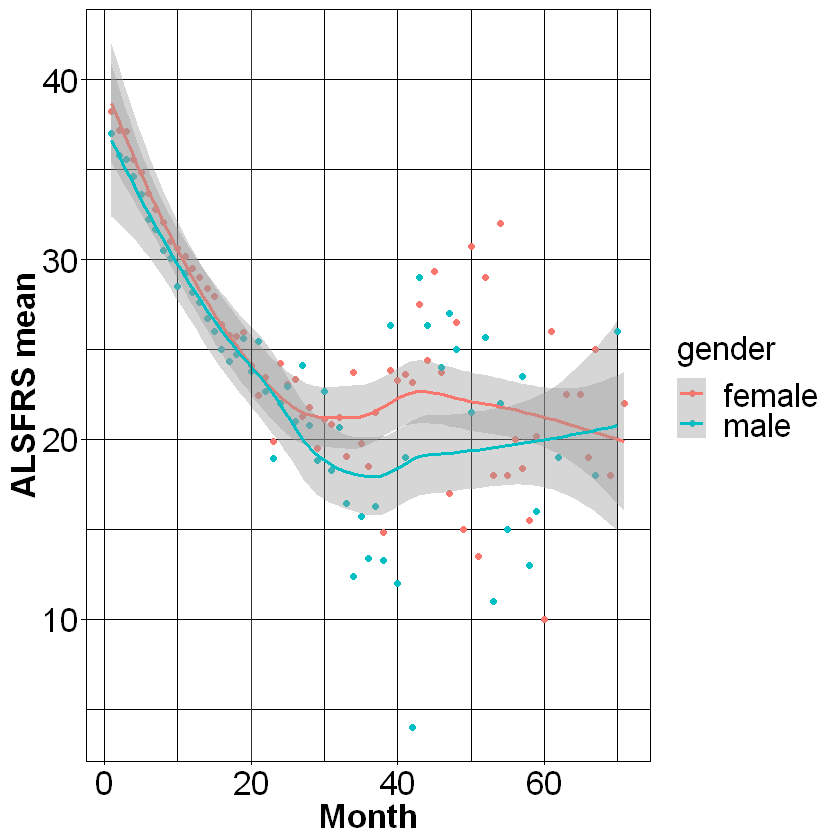

In [5]:
#### gender differences ####

reaction$gender <- NA
reaction$gender[which(reaction$f_male_bl==0)] <- "male"
reaction$gender[which(reaction$f_male_bl==1)] <- "female"

month_var <- reaction %>%
  group_by(month, gender) %>%
  summarise(var=var(r_alsfrs_r_total), mean=mean(r_alsfrs_r_total))

ggplot(data=month_var, aes(month, mean, group=gender, color=gender))+
  geom_point()+
  geom_smooth()+
  ylab("ALSFRS mean")+
  xlab("Month")+
  theme_linedraw()+
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"))+
  geom_vline(xintercept = 20, col='gray20')+
  theme(plot.title = element_text(size = 20, face = "bold", colour='black'),
        legend.title=element_text(size=20), 
        legend.text=element_text(size=20))
  

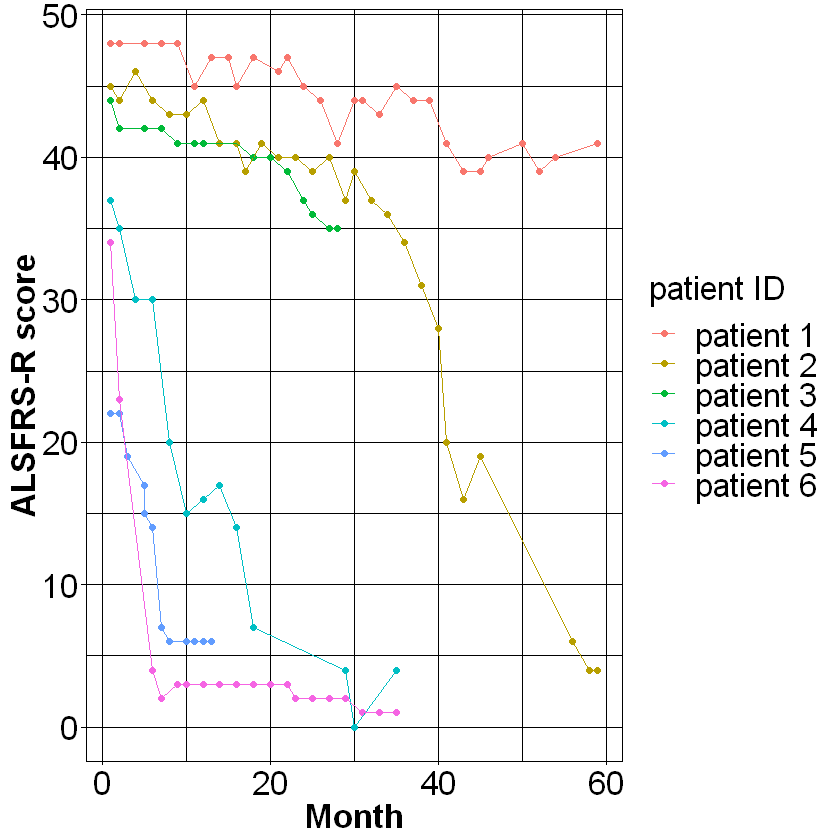

In [6]:
#### patients plot ####
check <- reaction[, c(2, 112, 77)]
select_pid <- c(585126, 418177, 764679, 374107, 242479, 354912)
check <- check[which(check$pid %in% select_pid), ] 

check$pid[which(check$pid==select_pid[2])] <- "patient 1"
check$pid[which(check$pid==select_pid[1])] <- "patient 2"
check$pid[which(check$pid==select_pid[5])] <- "patient 3"
check$pid[which(check$pid==select_pid[4])] <- "patient 4"
check$pid[which(check$pid==select_pid[6])] <- "patient 5"
check$pid[which(check$pid==select_pid[3])] <- "patient 6"

check$pid <- as.factor(check$pid)
ggplot(data=check, aes(x=month, y=r_alsfrs_r_total, group=pid, color=pid))+
  geom_point()+
  geom_line()+
  ylab("ALSFRS-R score")+
  xlab("Month")+
  theme_linedraw()+
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"))+
  theme(plot.title = element_text(size = 20, face = "bold", colour='black'),
        legend.title=element_text(size=20), 
        legend.text=element_text(size=20))+
  labs(color = "patient ID")
  